<a href="https://colab.research.google.com/github/Salma-221/Depi-project/blob/main/ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df= pd.read_csv("/content/TrainRides_Cleaned_Enhanced2 (1)Final Salma.csv")
df['Cancelled'] = (df['Journey Status'] == 'Cancelled').astype(int)
monthly = df.groupby(["Journey year", "Journey Month"])["Cancelled"].sum().reset_index()

# تعريف mapping للشهور
month_map = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}
monthly["Journey Month"] = monthly["Journey Month"].map(month_map)
monthly = monthly.sort_values(by=["Journey year", "Journey Month"]).reset_index(drop=True)


In [ ]:
def regression_model(X, Y, degree=1, X_future=None):

    X = np.array(X)
    Y = np.array(Y)

    if degree > 1:
        poly = PolynomialFeatures(degree=degree)
        X_poly = poly.fit_transform(X)
        model = LinearRegression()
        model.fit(X_poly, Y)
        Y_pred = model.predict(X_poly)

        # Future prediction
        if X_future is not None:
            X_future = np.array(X_future)
            X_future_poly = poly.transform(X_future)
            Y_future_pred = model.predict(X_future_poly)
        else:
            Y_future_pred = None

    else:
        model = LinearRegression()
        model.fit(X, Y)
        Y_pred = model.predict(X)

        # Future prediction
        if X_future is not None:
            X_future = np.array(X_future)
            Y_future_pred = model.predict(X_future)
        else:
            Y_future_pred = None

    plt.scatter(range(len(Y)), Y, label="Actual")
    plt.plot(range(len(Y)), Y_pred, label="Predicted")
    plt.title(f"Regression Model (degree = {degree})")
    plt.xlabel("Samples")
    plt.ylabel("Y")
    plt.legend()
    plt.show()

    return Y_future_pred


In [ ]:
monthly

,Journey year,Journey Month,Cancelled
0,2024,1,475
1,2024,2,432
2,2024,3,495
3,2024,4,478


In [ ]:
def regression_model(X, Y, degree=1, X_future=None):

    X = np.array(X)
    Y = np.array(Y)

    if degree > 1:
        poly = PolynomialFeatures(degree=degree)
        X_poly = poly.fit_transform(X)
        model = LinearRegression()
        model.fit(X_poly, Y)
        Y_pred = model.predict(X_poly)

        # Future prediction
        if X_future is not None:
            X_future = np.array(X_future)
            X_future_poly = poly.transform(X_future)
            Y_future_pred = model.predict(X_future_poly)
        else:
            Y_future_pred = None

    else:
        model = LinearRegression()
        model.fit(X, Y)
        Y_pred = model.predict(X)

        # Future prediction
        if X_future is not None:
            X_future = np.array(X_future)
            Y_future_pred = model.predict(X_future)
        else:
            Y_future_pred = None

    plt.scatter(range(len(Y)), Y, label="Actual")
    plt.plot(range(len(Y)), Y_pred, label="Predicted")
    plt.title(f"Regression Model (degree = {degree})")
    plt.xlabel("Samples")
    plt.ylabel("Y")
    plt.legend()
    plt.show()

    return Y_future_pred


(4, 2)
(4,)


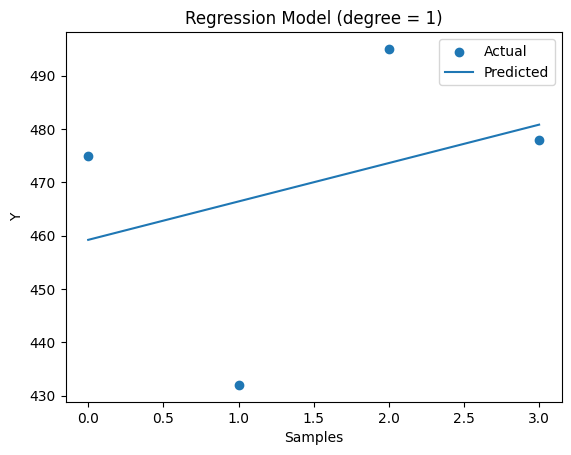

Predicted # cancelation for future month: [480.8]


In [ ]:
import numpy as np
need_to_predict = [2024,4]
Y = monthly["Cancelled"]
X = monthly.drop(columns=["Cancelled"])

print(X.shape)
print(Y.shape)

# Future prediction
Y_future = regression_model(X, Y, degree=1, X_future=[need_to_predict])

print("Predicted # cancelation for future month:", Y_future)


In [ ]:
monthly_delay = df.groupby(["Journey year",'Journey Month'])['Journey Delay (min)'].mean().reset_index()
#print(monthly_delay.head())
monthly_delay

,Journey year,Journey Month,Journey Delay (min)
0,2024,April,2.886904
1,2024,February,2.998823
2,2024,January,3.120577
3,2024,March,3.210053


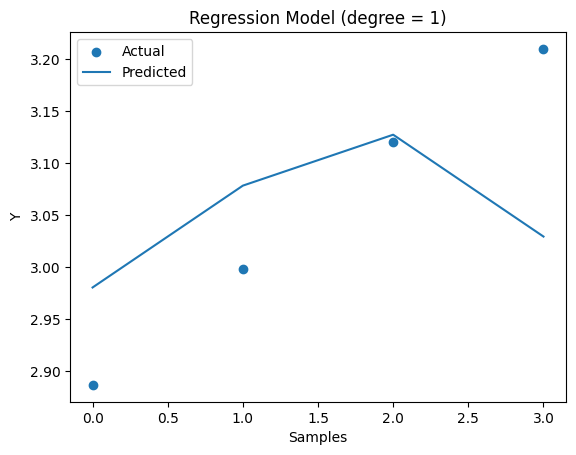

Predicted Delay: [2.98062085]


In [ ]:

monthly_delay['Journey Month'] = monthly_delay["Journey Month"].map(month_map)
X = monthly_delay[["Journey year","Journey Month"]]
Y = monthly_delay["Journey Delay (min)"]
need_to_predict=[[2024,4]]
Y_future_delay=regression_model(X,Y,degree=1,X_future=need_to_predict)
print("Predicted Delay:",Y_future_delay)

In [ ]:
monthly_passengers=df.groupby(["Journey year","Journey Month"]).size().reset_index(name="Passengers Volume")
monthly_passengers["Journey Month"]=monthly_passengers["Journey Month"].map(month_map)
monthly_passengers

,Journey year,Journey Month,Passengers Volume
0,2024,4,7781
1,2024,2,7644
2,2024,1,8111
3,2024,3,8117


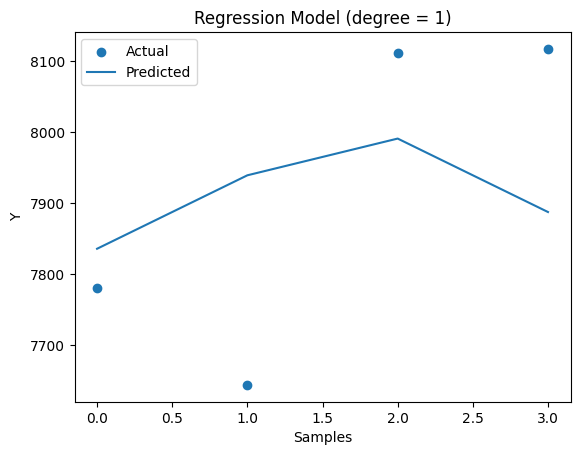

Predict Passenger Volume:  [7835.7]


In [ ]:
X=monthly_passengers[["Journey year","Journey Month"]]
Y=monthly_passengers["Passengers Volume"]
need_to_predict=[[2024,4]]
Y_future_passengers=regression_model(X,Y,degree=1,X_future=need_to_predict)
print("Predict Passenger Volume: ",Y_future_passengers)

In [ ]:
import pickle
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, Y)

pickle.dump(model, open("model.pkl", "wb"))

In [ ]:
from fastapi import FastAPI
import pickle
import numpy as np

app = FastAPI()
model = pickle.load(open("model.pkl", "rb"))

@app.get("/")
def home():
    return {"message": "Model is running!"}

@app.post("/predict")
def predict(data: list):
    arr = np.array([data])
    result = model.predict(arr)[0]
    return {"prediction": int(result)}